In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPool2D
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import zipfile
from numpy import argmax

In [2]:
#taking file zip dataset in google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
local_zip = '/content/gdrive/MyDrive/Eye_Disease.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
PATH = "/content/Eye_diseases"
data_dir_list = os.listdir(PATH)
data_dir_list

['Crossed_Eyes', 'Uveitis', 'Glaucoma', 'Cataracts', 'Normal', 'Bulging_Eyes']

In [5]:
img_rows=224
img_cols=224

num_epoch = 20
batch_size = 32

img_data_list=[]
classes_names_list=[]
target_column=[]
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting image from {} folder".format(dataset))
    img_list= os.listdir(PATH +"/"+ dataset)
    for img in img_list:
        input_img = cv2.imread(PATH +"/"+dataset+"/"+img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting image from Crossed_Eyes folder
Getting image from Uveitis folder
Getting image from Glaucoma folder
Getting image from Cataracts folder
Getting image from Normal folder
Getting image from Bulging_Eyes folder


In [6]:
num_classes = len(classes_names_list)
print("num_classes",num_classes)
img_data = np.array(img_data_list) # convert images in numpy array 
img_data = img_data.astype('float32')
img_data /= 255
print("Shape of image data",img_data.shape)
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape 
print("number of samples",num_of_samples)
print("target column before encoding",target_column)

num_classes 6
Shape of image data (1561, 224, 224, 3)
number of samples 1561
target column before encoding ['Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Crossed_Eyes', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Uveitis', 'Glaucoma', 'Glauc

In [7]:
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([0, 1, 2, 3, 4, 5])

In [8]:
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_temp,y_train,y_temp = train_test_split(X,Y,test_size=0.3,random_state=2)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,test_size=0.3,random_state=2)

In [16]:
Model = Sequential()

Model.add(Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
Model.add(Conv2D(64,(3,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

Model.add(Conv2D(128,(3,3),activation='relu'))
Model.add(Conv2D(128,(3,3),activation='relu'))
Model.add(MaxPool2D(pool_size=(2,2)))
Model.add(Dropout(0.2))

Model.add(Flatten())
Model.add(Dense(128,activation='relu'))
Model.add(Dropout(0.2))
Model.add(Dense(num_classes,activation='softmax'))
Model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 128)     147584    
                                                      

In [17]:
hist = Model.fit(X_train,y_train,batch_size=batch_size,epochs=num_epoch,verbose=1,validation_data=(X_test,y_test))
score = Model.evaluate(X_test,y_test,batch_size=batch_size)
print('Test Loss',score[0])
print("Test Accuracy",score[1])

Epoch 1/20
35/35 [==============================] - 10s 253ms/step - loss: 0.7770 - accuracy: 0.8864 - val_loss: 0.6772 - val_accuracy: 0.8750
Epoch 2/20
35/35 [==============================] - 9s 244ms/step - loss: 0.4085 - accuracy: 0.9139 - val_loss: 0.5357 - val_accuracy: 0.8780
Epoch 3/20
35/35 [==============================] - 9s 244ms/step - loss: 0.2740 - accuracy: 0.9240 - val_loss: 0.5111 - val_accuracy: 0.8933
Epoch 4/20
35/35 [==============================] - 9s 245ms/step - loss: 0.2073 - accuracy: 0.9368 - val_loss: 0.4596 - val_accuracy: 0.9024
Epoch 5/20
35/35 [==============================] - 9s 245ms/step - loss: 0.1863 - accuracy: 0.9460 - val_loss: 0.5433 - val_accuracy: 0.8933
Epoch 6/20
35/35 [==============================] - 9s 246ms/step - loss: 0.1585 - accuracy: 0.9496 - val_loss: 0.5212 - val_accuracy: 0.9085
Epoch 7/20
35/35 [==============================] - 9s 249ms/step - loss: 0.1001 - accuracy: 0.9698 - val_loss: 0.8336 - val_accuracy: 0.9024
Epoch

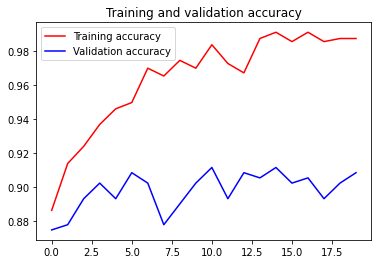

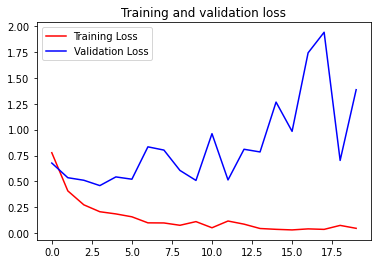

In [18]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
from google.colab import files
Model.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [20]:
new_model = tf.keras.models.load_model('/content/my_model')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 128)     147584    
                                                      

In [21]:
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
with open("Model.tflite",'wb') as f:
     f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp7gt3pl7x/assets


INFO:tensorflow:Assets written to: /tmp/tmp7gt3pl7x/assets
